# Support Vector Regression

## Importing librairies

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Importing dataset

In [17]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:-1].values
Y = dataset.iloc[:,-1].values

In [18]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [19]:
print(Y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [20]:
dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [21]:
Y = Y.reshape(len(Y),1)

In [22]:
print(Y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature scaling

In [23]:
#Standartscaler expects a 2D input
from sklearn.preprocessing import StandardScaler
ssx = StandardScaler()
ssy = StandardScaler()
X = ssx.fit_transform(X)
Y = ssy.fit_transform(Y)

In [24]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [25]:
print(Y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the Support Vector Regression on the whole set

In [26]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X,Y)

C:\Users\aymen\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

## Predcting a new result

In [33]:
ssy.inverse_transform(regressor.predict(ssx.transform([[6.5]])))
# we need to inverse the feature scaling to have the right result

array([170370.0204065])

## Visualising the SVR results 

Text(0, 0.5, 'Salary')

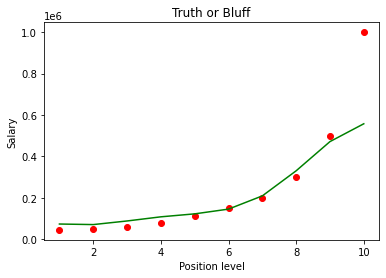

In [44]:
plt.scatter(ssx.inverse_transform(X),ssy.inverse_transform(Y), color = 'red')
plt.plot(ssx.inverse_transform(X), ssy.inverse_transform(regressor.predict((X))), color = 'green')
# X in the predict method is correct because it's already scaled
plt.title('Truth or Bluff')
plt.xlabel('Position level')
plt.ylabel('Salary')

## Visualising the SVR results with smoother curve and higher resolution

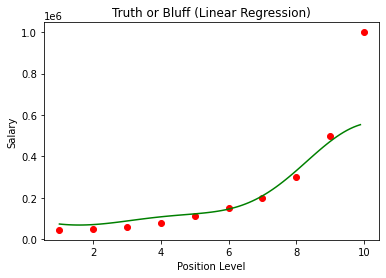

In [53]:
X_grid = np.arange(min(ssx.inverse_transform(X)), max(ssx.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(ssx.inverse_transform(X),ssy.inverse_transform(Y), color = 'red')
plt.plot(X_grid, ssy.inverse_transform(regressor.predict((ssx.transform(X_grid)))), color = 'green')
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

## Converting to script

In [54]:
!jupyter nbconvert --to script SVR.ipynb

[NbConvertApp] Converting notebook SVR.ipynb to script
[NbConvertApp] Writing 1930 bytes to SVR.py
